In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1-D advection

In [2]:
def Exact(dt):
    c    = 0.1
    xs   = np.linspace(0., 1., 41)
    ts   = np.arange(0., 8. + dt, dt)
    phis = np.full((len(ts), len(xs)), np.nan, dtype = float)
    
    # Boundary condition
    phis[:,  0] =  1.
    phis[:, -1] = -1.
    
    # Initial profile
    for j, x in enumerate(xs):
        if (x >= 0.) & (x <= 0.1):
            phis[0, j] = np.cos(10 * np.pi * x)
        elif (x >= 0.1) & (x <= 1.):
            phis[0, j] = -1.
    
    for i, t in enumerate(ts[1 :]):
        i += 1
        for j, x in enumerate(xs[1 : -1]):
            j += 1
            
            if (x >= 0) & (x <= c * t):
                phis[i, j] = 1.
            elif (x >= c * t) & (x <= c * t + 0.1):
                phis[i, j] = np.cos(10 * np.pi * (x - c * t))
            elif (x >= c * t + 0.1) & (x <= 1.):
                phis[i, j] = -1.
    
    return xs, ts, phis


def Numeric(dt, scheme):
    c    = 0.1
    xs   = np.linspace(0., 1., 41)
    dx   = xs[1] - xs[0]
    ts   = np.arange(0., 8. + dt, dt)
    phis = np.full((len(ts), len(xs)), np.nan, dtype = float)
    
    # Boundary condition
    phis[:,  0] =  1.
    phis[:, -1] = -1.
    
    # Initial profile
    for j, x in enumerate(xs):
        if (x >= 0.) & (x <= 0.1):
            phis[0, j] = np.cos(10 * np.pi * x)
        elif (x >= 0.1) & (x <= 1.):
            phis[0, j] = -1.

    for i, t in enumerate(ts[1 :]):
        i += 1
        for j, x in enumerate(xs[1 : -1]):
            j += 1
            
            if scheme == "FE_CD2":
                phis[i, j] = phis[i - 1, j] - dt * c * (phis[i - 1, j + 1] - phis[i - 1, j - 1]) / (2. * dx)
            
            elif scheme == "FE_UP1":
                phis[i, j] = phis[i - 1, j] - dt * c * (phis[i - 1, j] - phis[i - 1, j - 1]) / dx
            
            elif scheme == "LF_CD2":
                if i == 1:
                    phis[i, j] = phis[i - 1, j] - dt * c * (phis[i -1, j + 1] - phis[i - 1, j - 1]) / (2. * dx)
                else:
                    phis[i, j] = phis[i - 2, j] - dt * c * (phis[i -1, j + 1] - phis[i - 1, j - 1]) / dx
    
    return xs, ts, phis

## dt = 0.001

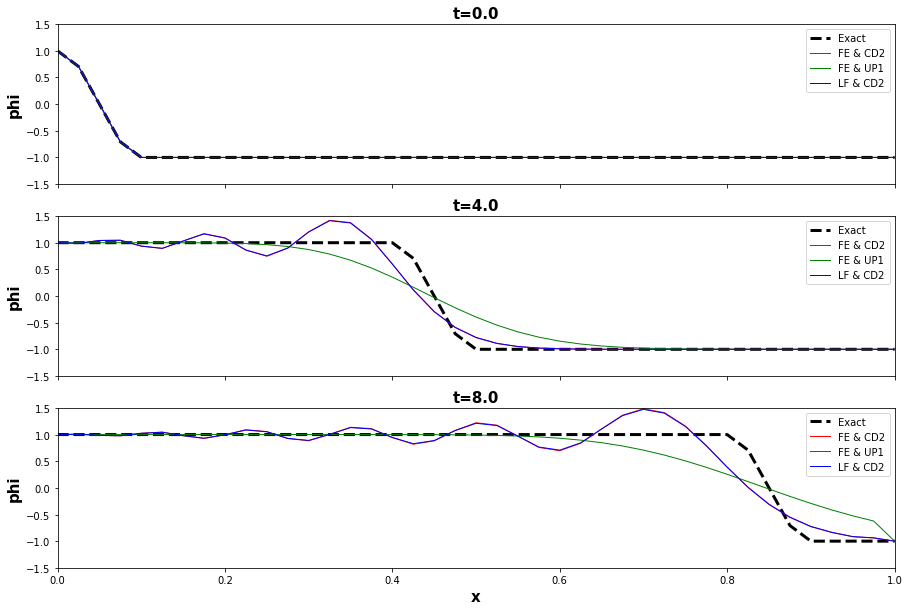

In [3]:
dt = 0.001
xs, ts, exact  = Exact(dt)
xs, ts, fe_cd2 = Numeric(dt, "FE_CD2")
xs, ts, fe_up1 = Numeric(dt, "FE_UP1")
xs, ts, lf_cd2 = Numeric(dt, "LF_CD2")

fig, subs = plt.subplots(nrows = 3, sharex = True, figsize = (15, 10))

tsPlot = [0., 4., 8.]

for t, tPlot in enumerate(tsPlot):
    sub = subs[t]
    
    sub.set_title("t=%.1f" % tPlot, fontsize = 15, fontdict = {"weight": "bold"})
    
    sub.plot(xs, exact[np.where(ts == tPlot)[0][0]], c = "k", lw = 3, ls = "--", label = "Exact")
    sub.plot(xs, fe_cd2[np.where(ts == tPlot)[0][0]], c = "r", lw = 1, ls = "-", label = "FE & CD2")
    sub.plot(xs, fe_up1[np.where(ts == tPlot)[0][0]], c = "g", lw = 1, ls = "-", label = "FE & UP1")
    sub.plot(xs, lf_cd2[np.where(ts == tPlot)[0][0]], c = "b", lw = 1, ls = "-", label = "LF & CD2")
    
    sub.legend(fontsize = 10)
    
    sub.set_xlim(0., 1.)
    sub.set_ylim(-1.5, 1.5)
    
    if t == 2:
        sub.set_xlabel("x", fontsize = 15, fontdict = {"weight": "bold"})
    sub.set_ylabel("phi", fontsize = 15, fontdict = {"weight": "bold"})

plt.savefig("./HW4/1d_%s.png" % dt, dpi = 500, bbox_inches = "tight")

## dt = 0.01

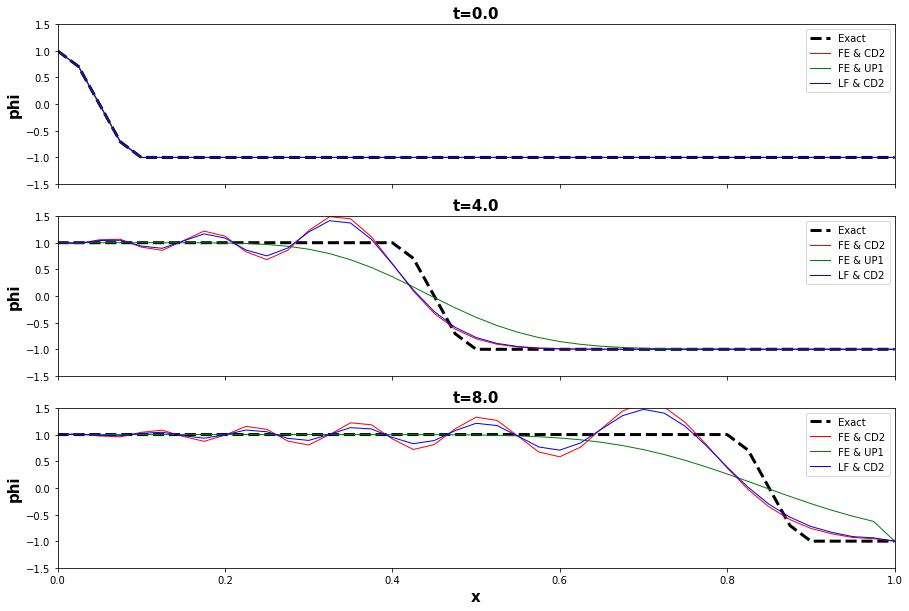

In [4]:
dt = 0.01
xs, ts, exact  = Exact(dt)
xs, ts, fe_cd2 = Numeric(dt, "FE_CD2")
xs, ts, fe_up1 = Numeric(dt, "FE_UP1")
xs, ts, lf_cd2 = Numeric(dt, "LF_CD2")

fig, subs = plt.subplots(nrows = 3, sharex = True, figsize = (15, 10))

tsPlot = [0., 4., 8.]

for t, tPlot in enumerate(tsPlot):
    sub = subs[t]
    
    sub.set_title("t=%.1f" % tPlot, fontsize = 15, fontdict = {"weight": "bold"})
    
    sub.plot(xs, exact[np.where(ts == tPlot)[0][0]], c = "k", lw = 3, ls = "--", label = "Exact")
    sub.plot(xs, fe_cd2[np.where(ts == tPlot)[0][0]], c = "r", lw = 1, ls = "-", label = "FE & CD2")
    sub.plot(xs, fe_up1[np.where(ts == tPlot)[0][0]], c = "g", lw = 1, ls = "-", label = "FE & UP1")
    sub.plot(xs, lf_cd2[np.where(ts == tPlot)[0][0]], c = "b", lw = 1, ls = "-", label = "LF & CD2")
    
    sub.legend(fontsize = 10)
    
    sub.set_xlim(0., 1.)
    sub.set_ylim(-1.5, 1.5)
    
    if t == 2:
        sub.set_xlabel("x", fontsize = 15, fontdict = {"weight": "bold"})
    sub.set_ylabel("phi", fontsize = 15, fontdict = {"weight": "bold"})

plt.savefig("./HW4/1d_%s.png" % dt, dpi = 500, bbox_inches = "tight")

## dt = 0.05

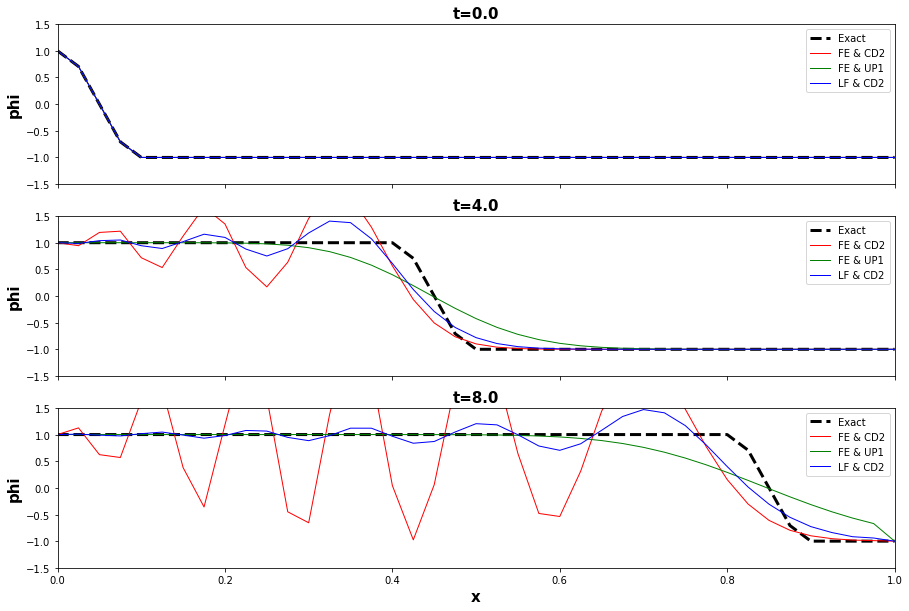

In [5]:
dt = 0.05
xs, ts, exact  = Exact(dt)
xs, ts, fe_cd2 = Numeric(dt, "FE_CD2")
xs, ts, fe_up1 = Numeric(dt, "FE_UP1")
xs, ts, lf_cd2 = Numeric(dt, "LF_CD2")


fig, subs = plt.subplots(nrows = 3, sharex = True, figsize = (15, 10))

tsPlot = [0., 4., 8.]

for t, tPlot in enumerate(tsPlot):
    sub = subs[t]
    
    sub.set_title("t=%.1f" % tPlot, fontsize = 15, fontdict = {"weight": "bold"})
    
    sub.plot(xs, exact[np.where(ts == tPlot)[0][0]], c = "k", lw = 3, ls = "--", label = "Exact")
    sub.plot(xs, fe_cd2[np.where(ts == tPlot)[0][0]], c = "r", lw = 1, ls = "-", label = "FE & CD2")
    sub.plot(xs, fe_up1[np.where(ts == tPlot)[0][0]], c = "g", lw = 1, ls = "-", label = "FE & UP1")
    sub.plot(xs, lf_cd2[np.where(ts == tPlot)[0][0]], c = "b", lw = 1, ls = "-", label = "LF & CD2")
    
    sub.legend(fontsize = 10)
    
    sub.set_xlim(0., 1.)
    sub.set_ylim(-1.5, 1.5)
    
    if t == 2:
        sub.set_xlabel("x", fontsize = 15, fontdict = {"weight": "bold"})
    sub.set_ylabel("phi", fontsize = 15, fontdict = {"weight": "bold"})

plt.savefig("./HW4/1d_%s.png" % dt, dpi = 500, bbox_inches = "tight")

## dt = 0.1

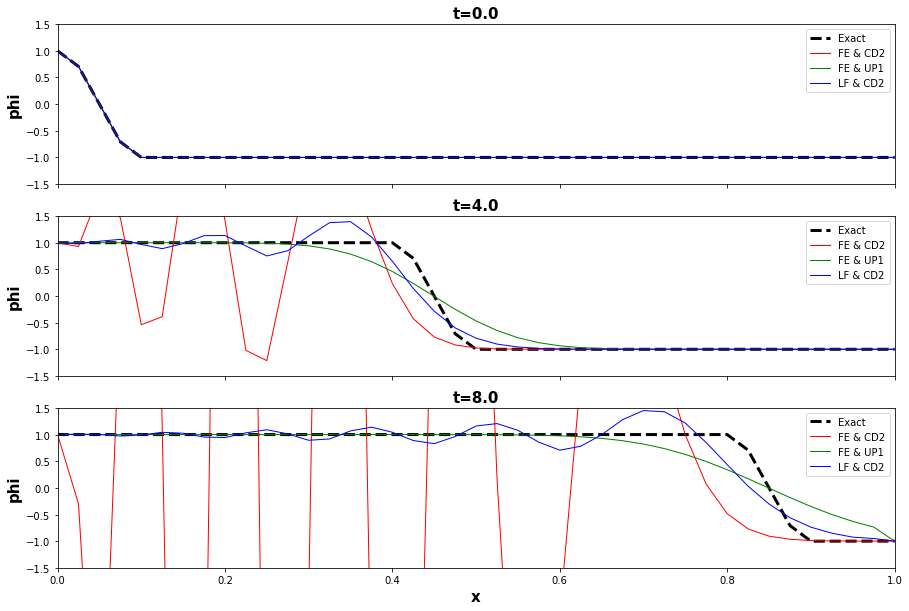

In [6]:
dt = 0.1
xs, ts, exact  = Exact(dt)
xs, ts, fe_cd2 = Numeric(dt, "FE_CD2")
xs, ts, fe_up1 = Numeric(dt, "FE_UP1")
xs, ts, lf_cd2 = Numeric(dt, "LF_CD2")


fig, subs = plt.subplots(nrows = 3, sharex = True, figsize = (15, 10))

tsPlot = [0., 4., 8.]

for t, tPlot in enumerate(tsPlot):
    sub = subs[t]
    
    sub.set_title("t=%.1f" % tPlot, fontsize = 15, fontdict = {"weight": "bold"})
    
    sub.plot(xs, exact[np.where(ts == tPlot)[0][0]], c = "k", lw = 3, ls = "--", label = "Exact")
    sub.plot(xs, fe_cd2[np.where(ts == tPlot)[0][0]], c = "r", lw = 1, ls = "-", label = "FE & CD2")
    sub.plot(xs, fe_up1[np.where(ts == tPlot)[0][0]], c = "g", lw = 1, ls = "-", label = "FE & UP1")
    sub.plot(xs, lf_cd2[np.where(ts == tPlot)[0][0]], c = "b", lw = 1, ls = "-", label = "LF & CD2")
    
    sub.legend(fontsize = 10)
    
    sub.set_xlim(0., 1.)
    sub.set_ylim(-1.5, 1.5)
    
    if t == 2:
        sub.set_xlabel("x", fontsize = 15, fontdict = {"weight": "bold"})
    sub.set_ylabel("phi", fontsize = 15, fontdict = {"weight": "bold"})

plt.savefig("./HW4/1d_%s.png" % dt, dpi = 500, bbox_inches = "tight")

## dt = 0.5

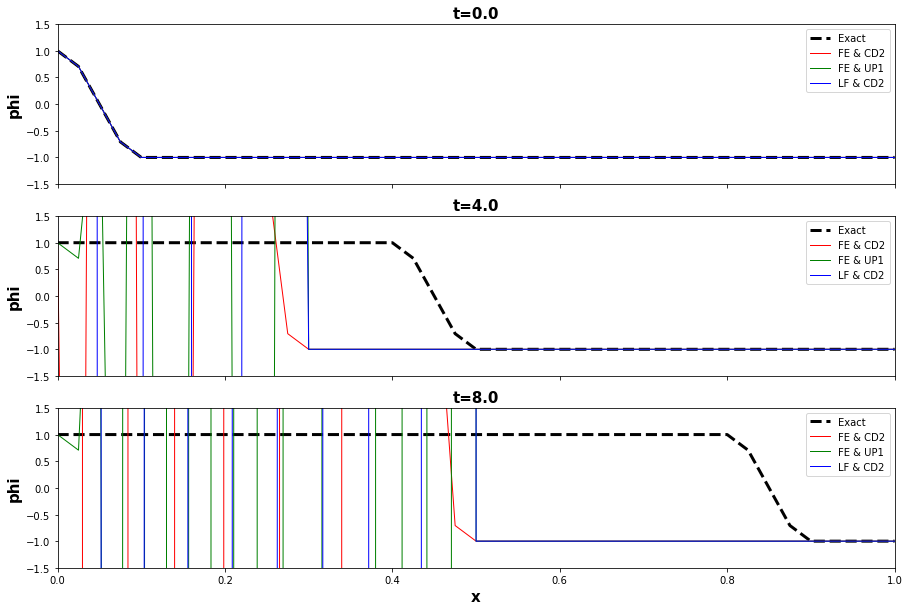

In [3]:
dt = 0.5
xs, ts, exact  = Exact(dt)
xs, ts, fe_cd2 = Numeric(dt, "FE_CD2")
xs, ts, fe_up1 = Numeric(dt, "FE_UP1")
xs, ts, lf_cd2 = Numeric(dt, "LF_CD2")


fig, subs = plt.subplots(nrows = 3, sharex = True, figsize = (15, 10))

tsPlot = [0., 4., 8.]

for t, tPlot in enumerate(tsPlot):
    sub = subs[t]
    
    sub.set_title("t=%.1f" % tPlot, fontsize = 15, fontdict = {"weight": "bold"})
    
    sub.plot(xs, exact[np.where(ts == tPlot)[0][0]], c = "k", lw = 3, ls = "--", label = "Exact")
    sub.plot(xs, fe_cd2[np.where(ts == tPlot)[0][0]], c = "r", lw = 1, ls = "-", label = "FE & CD2")
    sub.plot(xs, fe_up1[np.where(ts == tPlot)[0][0]], c = "g", lw = 1, ls = "-", label = "FE & UP1")
    sub.plot(xs, lf_cd2[np.where(ts == tPlot)[0][0]], c = "b", lw = 1, ls = "-", label = "LF & CD2")
    
    sub.legend(fontsize = 10)
    
    sub.set_xlim(0., 1.)
    sub.set_ylim(-1.5, 1.5)
    
    if t == 2:
        sub.set_xlabel("x", fontsize = 15, fontdict = {"weight": "bold"})
    sub.set_ylabel("phi", fontsize = 15, fontdict = {"weight": "bold"})

plt.savefig("./HW4/1d_%s.png" % dt, dpi = 500, bbox_inches = "tight")